In [26]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("src/titanic.csv")

In [28]:
[0, 1, 1, 0, 2, 3] -> [[0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]] # one hot encoder
['john', 'guillaume', 'john', 'francois'] -> [0, 1, 0, 2] # label encoder 

SyntaxError: invalid syntax (468973622.py, line 1)

In [ ]:
"guillaume dhjhhe dhhhe".split('e')

['guillaum', ' dhjhh', ' dhhh', '']

In [ ]:
name_lengths = []
for name in df["Name"]:
    name_lengths.append(len(name))
df["Name_length"] = name_lengths

# equivalents 
df["Name_length"] = df["Name"].apply(len)


In [ ]:

df["Name_length"] = df["Name"].apply(len) # number of chars
df["Name_number_of_words"] = df["Name"].apply(lambda value: len(value.split())) # number of words

In [ ]:
# determiner variable cible // Survived
# drop columns : PassengerId, Ticket, Cabin, Name
# keep columns : Pclass, Name_length, Sex-onehotencoded, Age, SibSp, Parch, Embarked-One-encoded, Name_number_of_words

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isna().sum()

PassengerId               0
Survived                  0
Pclass                    0
Name                      0
Sex                       0
Age                     177
SibSp                     0
Parch                     0
Ticket                    0
Fare                      0
Cabin                   687
Embarked                  2
Name_length               0
Name_number_of_words      0
dtype: int64

In [ ]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
import seaborn as sns

/var/folders/p_/qx9nckzd0lqcy9pm1zt4nq5w0000gn/T/ipykernel_633/2732350774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

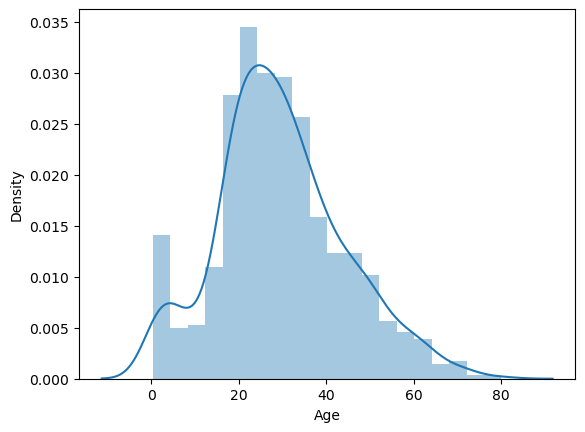

In [ ]:
sns.distplot(df["Age"])

In [ ]:
condition = df["Survived"] == 1 # description condition pour le mask / filtre
df[condition].head() #creer un sous ensemble du df qui respecte la condition

/var/folders/p_/qx9nckzd0lqcy9pm1zt4nq5w0000gn/T/ipykernel_633/3269464886.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survived"] == 1]["Age"])


<Axes: xlabel='Age', ylabel='Density'>

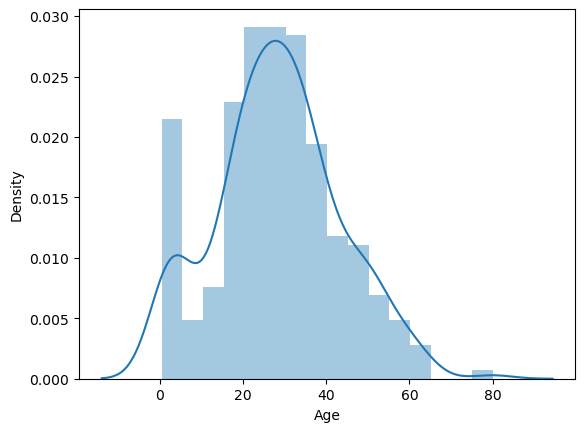

In [ ]:
sns.distplot(df[df["Survived"] == 1]["Age"])

/var/folders/p_/qx9nckzd0lqcy9pm1zt4nq5w0000gn/T/ipykernel_633/3109599692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survived"] == 0]["Age"])


<Axes: xlabel='Age', ylabel='Density'>

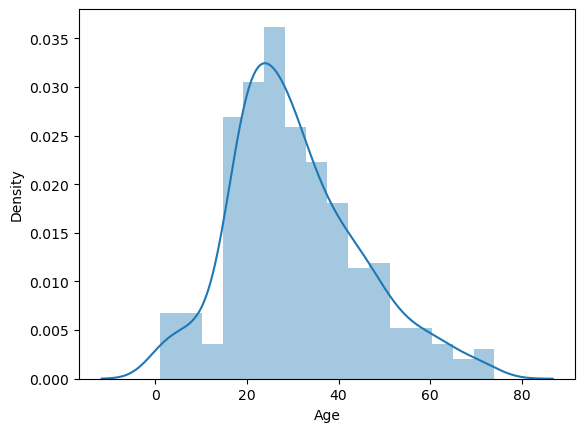

In [ ]:
sns.distplot(df[df["Survived"] == 0]["Age"])

In [ ]:
df.shape

(891, 14)

In [ ]:
feature_list = ["Pclass", "Name_length", "Sex", "Age", "SibSp", "Parch","Name_number_of_words"]
X = df[feature_list]
y = df["Survived"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
si = SimpleImputer(strategy="mean")
X_train["Age"] = si.fit_transform(X_train[["Age"]])
X_test["Age"] = si.transform(X_test[["Age"]])

#sic = SimpleImputer(strategy="most_frequent")
#X_train["Embarked"] = sic.fit_transform(X_train[["Embarked"]])

In [ ]:
X_train

,Pclass,Name_length,Sex,Age,SibSp,Parch,Name_number_of_words
486,1,47,female,35.000000,1,0,7
238,2,31,male,19.000000,0,0,4
722,2,28,male,34.000000,0,0,4
184,3,35,female,4.000000,0,2,4
56,2,17,female,21.000000,0,0,3
...,...,...,...,...,...,...,...
547,2,26,male,29.931881,0,0,5
469,3,29,female,0.750000,2,1,4
736,3,39,female,48.000000,1,3,6
462,1,17,male,47.000000,0,0,4


In [ ]:
[i for i,j in enumerate(X_train.dtypes) if j != 'object'] # repere les valeurs numeriques dans mes colonnes

[0, 1, 3, 4, 5, 6]

In [ ]:
X_train.dtypes

Pclass                    int64
Name_length               int64
Sex                      object
Age                     float64
SibSp                     int64
Parch                     int64
Name_number_of_words      int64
dtype: object

In [ ]:
numeric_features = [0, 1, 3, 4, 5, 6] 


[0, 1, 3, 4, 5, 6]

In [ ]:
numeric_features = [i for i,j in enumerate(X_train.dtypes) if j != 'object'] 
numeric_transformer = StandardScaler()

categorical_features = [2] 
categorical_transformer = OneHotEncoder(drop="first")

feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
X_test = feature_encoder.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.score(X_train, y_train), lr.score(X_test, y_test) # pas d'overfit

(0.8053892215568862, 0.7937219730941704)

In [ ]:
feature_encoder.get_feature_names_out() # donne toutes les colonnes de X_train

array(['cat__Sex_male', 'num__Pclass', 'num__Name_length', 'num__Age',
       'num__SibSp', 'num__Parch', 'num__Name_number_of_words'],
      dtype=object)

In [ ]:
np.abs(lr.coef_) # donne tous les coefs associes au colonnes en valeur absolue

array([[2.46694652, 0.95336999, 0.41185396, 0.55049999, 0.28856202,
        0.08446783, 0.21692501]])

In [ ]:
coeff_importance = pd.DataFrame([feature_encoder.get_feature_names_out(), np.abs(lr.coef_)[0]]).T

<Axes: xlabel='0'>

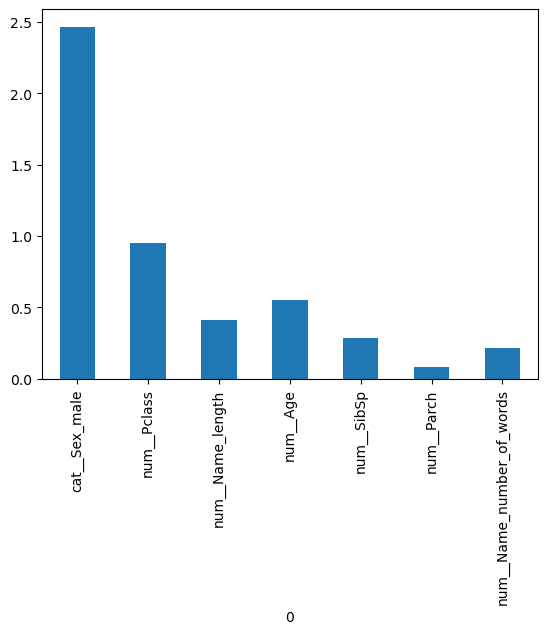

In [ ]:
coeff_importance.set_index(coeff_importance[0])[1].plot(kind='bar')

In [33]:
df[df['Sex'] == 'male']['Survived'].mean()


0.18890814558058924

In [32]:
df[df['Sex'] == 'female']['Survived'].mean()

0.7420382165605095

In [ ]:
#Code pour les matrices de confusion : 
cm = confusion_matrix(y_train, y_train_pred, labels=lr.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() 

NameError: name 'confusion_matrix' is not defined